In [11]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
# Load an image from file as function
def load_image(image_path: str) -> np.ndarray:
    """
    Load an image from file, using OpenCV
    """
    return cv2.imread(image_path)[:, :, ::-1]
    

# Display an image as function
def display_image(image: np.ndarray, title: str="Image"):
    """
    Display an image using matplotlib. Rembember to use plt.show() to display the image
    """
    plt.imshow(image)
    plt.title(title)
    plt.show()


# Convert an image to grayscale
def grayscale_image(image: np.ndarray) -> np.ndarray:
    """
    Convert an image to grayscale. Convert the original image to a grayscale image. In a grayscale image, the pixel value of the
    3 channels will be the same for a particular X, Y coordinate. The equation for the pixel value
    [1] is given by:
        p = 0.299R + 0.587G + 0.114B
    Where the R, G, B are the values for each of the corresponding channels. We will do this by
    creating an array called img_gray with the same shape as img
    """
    # gray_img = 0.299 * image[:, :, 0:1] + 0.587 * image[:, :, 1:2] + 0.114 * image[:, :, 2:3]
    # return np.broadcast_to(gray_img.astype(image.dtype), image.shape)  # , gray_img.astype(image.dtype)[:, :, 0]
    gray_img = 0.299 * image[:, :, 0] + 0.587 * image[:, :, 1] + 0.114 * image[:, :, 2]
    return gray_img.astype(image.dtype)

In [35]:
img_path = '/home/lvdthieu/Documents/Projects/image-processing/Experiment/images/img.jpg'
img = load_image(img_path)
img.shape

(256, 256, 3)

In [45]:
img, gray_img = grayscale_image(img)

In [47]:
gray_img[:8, :8]

array([[58, 60, 60, 60, 58, 58, 58, 58],
       [58, 58, 58, 58, 58, 58, 56, 56],
       [58, 58, 58, 58, 56, 56, 56, 56],
       [60, 60, 60, 58, 58, 58, 58, 56],
       [62, 62, 62, 60, 60, 60, 60, 60],
       [63, 63, 63, 62, 62, 60, 60, 60],
       [62, 62, 62, 62, 60, 60, 60, 58],
       [60, 60, 60, 60, 60, 58, 58, 58]], dtype=uint8)

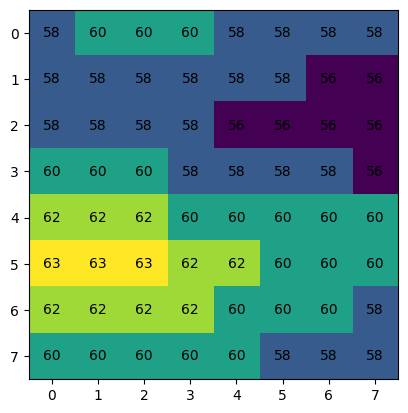

In [53]:
fig, ax = plt.subplots()
data = gray_img[:8, :8]
im = ax.imshow(data)
for i in range(data.shape[0]):
    for j in range(data.shape[1]):
        text = ax.text(j, i, data[i, j], ha='center', va='center', color='black')
plt.show()

In [62]:
import numpy as np
from matplotlib import pyplot as plt

SAMPLE_RATE = 44100  # Hertz
DURATION = 10  # Seconds

def generate_sine_wave(freq, sample_rate, duration):
    x = np.linspace(0, duration, sample_rate * duration, endpoint=False)
    frequencies = x * freq
    # 2pi because np.sin takes radians
    y = np.sin((2 * np.pi) * frequencies)
    return x, y

In [63]:
_, nice_tone = generate_sine_wave(400, SAMPLE_RATE, DURATION)
_, noise_tone = generate_sine_wave(4000, SAMPLE_RATE, DURATION)
noise_tone = noise_tone * 0.3

mixed_tone = nice_tone + noise_tone

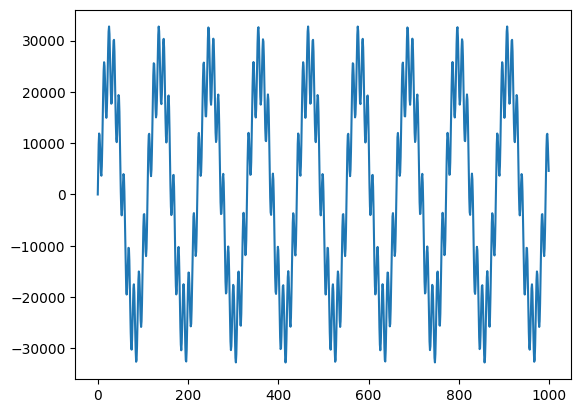

In [64]:
normalized_tone = np.int16((mixed_tone / mixed_tone.max()) * 32767)

plt.plot(normalized_tone[:1000])
plt.show()

In [65]:
from scipy.io.wavfile import write

# Remember SAMPLE_RATE = 44100 Hz is our playback rate
write("mysinewave.wav", SAMPLE_RATE, normalized_tone)

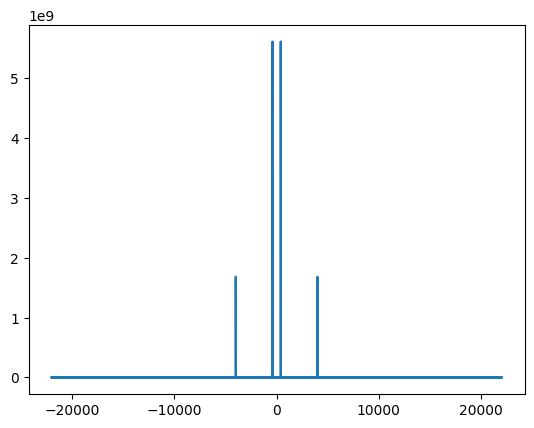

In [66]:
from scipy.fft import fft, fftfreq

# Number of samples in normalized_tone
N = SAMPLE_RATE * DURATION

yf = fft(normalized_tone)
xf = fftfreq(N, 1 / SAMPLE_RATE)

plt.plot(xf, np.abs(yf))
plt.show()

(256, 256)
(130, 130)


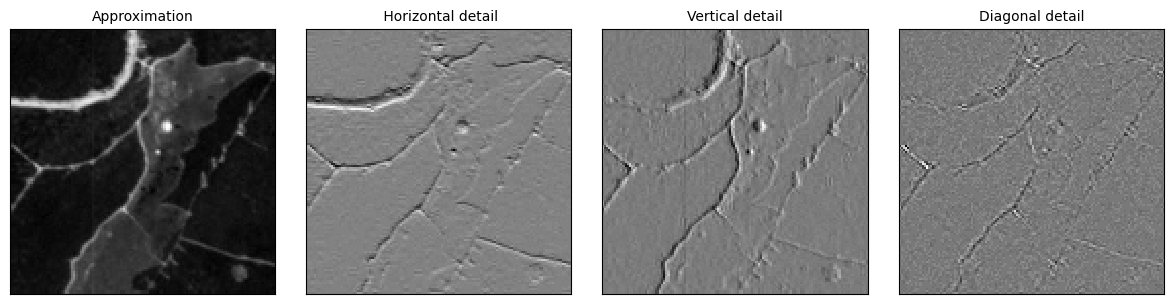

In [15]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

import pywt
import pywt.data

# Load image
original = grayscale_image(load_image("/home/lvdthieu/Documents/Projects/image-processing/Experiment/images/img.jpg"))
print(original.shape)
# Wavelet transform of image, and plot approximation and details
titles = ['Approximation', ' Horizontal detail',
          'Vertical detail', 'Diagonal detail']
coeffs2 = pywt.dwt2(original, 'bior1.3')
LL, (LH, HL, HH) = coeffs2
print(HL.shape)
fig = plt.figure(figsize=(12, 3))
for i, a in enumerate([LL, LH, HL, HH]):
    ax = fig.add_subplot(1, 4, i + 1)
    ax.imshow(a, interpolation="nearest", cmap=plt.cm.gray)
    ax.set_title(titles[i], fontsize=10)
    ax.set_xticks([])
    ax.set_yticks([])

fig.tight_layout()
plt.show()